In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Skipped Task 2

# Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

medv mean: 22.532806324110677    medv std: 9.197104087379818


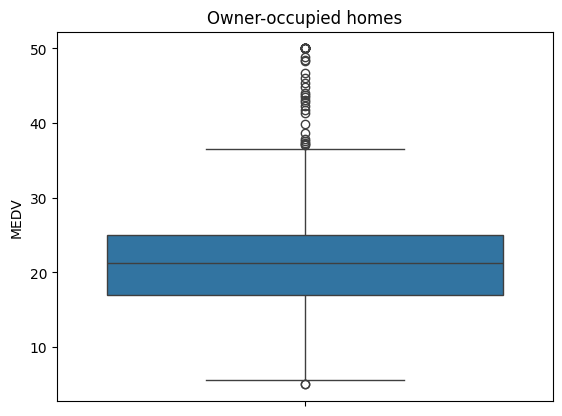

In [4]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Owner-occupied homes')
medv_mean = boston_df['MEDV'].mean()
medv_std = boston_df['MEDV'].std()
print(f'medv mean: {medv_mean}    medv std: {medv_std}')

**boxplot shows the median value of owner-occupied homes in $1000's. Mean is 22.533 and standard deviation is 9.197. Others is outliers.**

## Provide a  bar plot for the Charles river variable

number of unique values: 2
unique values: [0. 1.]
the number of occurrences of 0.0 are 471
the number of occurrences of 1.0 are 35


Text(0.5, 1.0, 'Number of homes near Charles river')

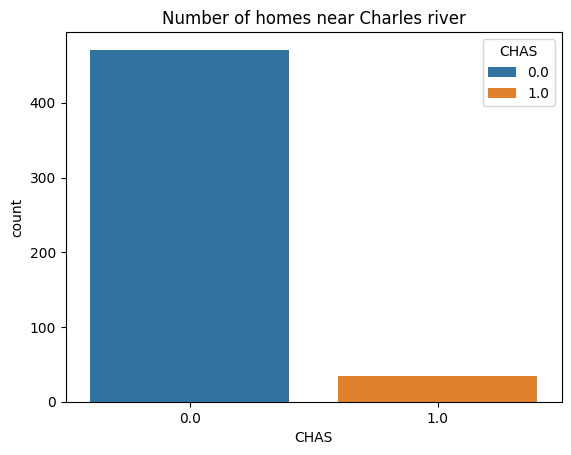

In [5]:
chas_boston_df = boston_df['CHAS']
nunique_values = chas_boston_df.nunique()
print(f'number of unique values: {nunique_values}')
unique_values = chas_boston_df.unique()
print(f'unique values: {unique_values}')
for v in unique_values:
    print(f"the number of occurrences of {v} are {chas_boston_df.value_counts()[v]}")
ax = sns.countplot(x='CHAS', hue='CHAS', data=boston_df)
ax.set_title('Number of homes near Charles river')

**From the bar plot, majority of the houses are not near Charles river.**

## Provide a boxplot for the MEDV variable vs the AGE variable. 
### (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV vs AGE group')

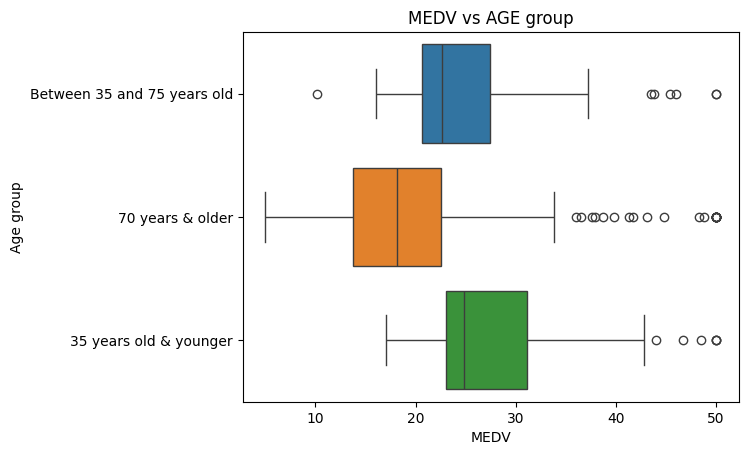

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age group'] = '35 years old & younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age group'] = 'Between 35 and 75 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age group'] = '70 years & older'
ax = sns.boxplot(x = 'MEDV', y='Age group', hue='Age group', data=boston_df)
ax.set_title('MEDV vs AGE group')

**The boxplot above shows that on average younger home owner-occupied homes have higher median values.**

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentrations vs proportion of non-retail business acres per town')

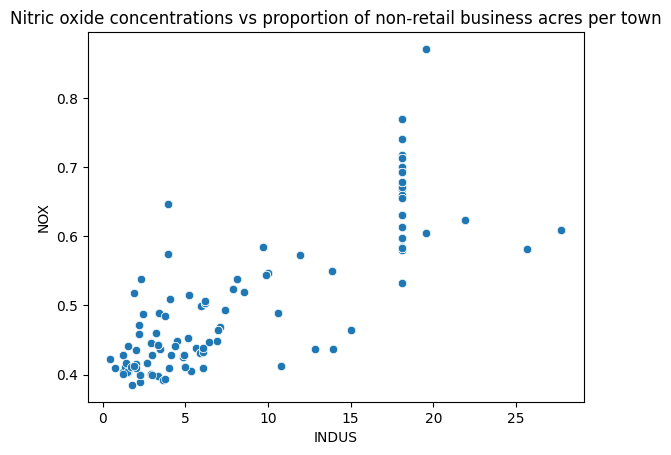

In [7]:
ax = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax.set_title('Nitric oxide concentrations vs proportion of non-retail business acres per town')

**From the scatter plot, we can see that values in the lower-left corner of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.**

**Generally speaking, a higher proprtion of non-retail business acres per town have a higher concentration of Nitric oxide.**

## Create a histogram for the pupil-teacher ratio variable

number of unique values: 46
unique values: [15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9 16.8 21.1 17.3 15.1 19.7 18.6
 16.1 18.9 19.  18.5 18.2 18.  20.9 19.1 21.2 14.7 16.6 15.6 14.4 12.6
 17.  16.4 17.4 15.9 13.  17.6 14.9 13.6 16.  14.8 18.4 19.6 16.9 20.2
 15.5 18.8 22.  20.1]
min: 12.6   max: 22.0
min: 0 v_min: 0.0   max: 140  v_max: 20.2


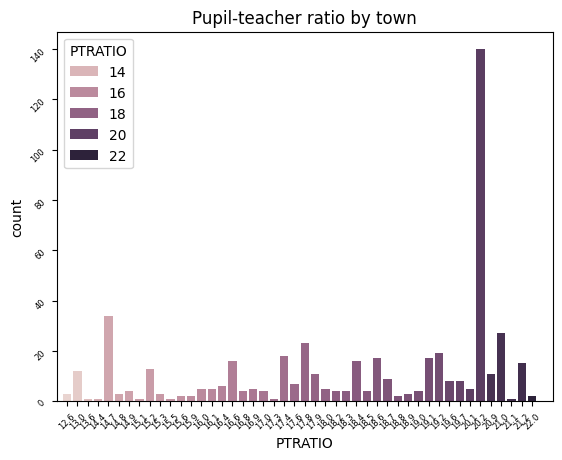

In [8]:
ptratio_boston_df = boston_df['PTRATIO']
nunique_values = ptratio_boston_df.nunique()
print(f'number of unique values: {nunique_values}')
unique_values = ptratio_boston_df.unique()
print(f'unique values: {unique_values}')
min_val = unique_values.min()
max_val = unique_values.max()
print(f'min: {min_val}   max: {max_val}')
min_count = 0
max_count = 0
v_max = 0.0
v_min = 0.0
for v in unique_values:
    count = ptratio_boston_df.value_counts()[v]
    if count < min_count:
        min_count = count
        v_min = v
    if count > max_count:
        max_count = count
        v_max = v
    #print(f"the number of occurrences of {v} are {count}")
print(f'min: {min_count} v_min: {v_min}   max: {max_count}  v_max: {v_max}')
ax = sns.countplot(x = 'PTRATIO', hue='PTRATIO',data = boston_df)
ax.set_title('Pupil-teacher ratio by town')
ax.set_xlim(-1,nunique_values + 1)
ax.tick_params(labelsize=6)
ax.tick_params(rotation=45)

**From the histogram, ratio of 20 pupils per teacher by town is the most dominant.** 

# Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### Our Hypothesis:
**- Null Hypothesis (H<sub>o</sub>): There is no significant difference between the meadian values of houses near the Charles River and those of houses not near (or far) the river.**

**- Alternative Hypothesis (H<sub>a</sub>): There is a significant difference between the meadian values of houses near the Charles River and those of houses not near (or far) the river.**

In [9]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 75 years old,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years & older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 75 years old,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 75 years old,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 75 years old,FAR
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,Between 35 and 75 years old,FAR
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,Between 35 and 75 years old,FAR
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years & older,FAR
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years & older,FAR
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years & older,FAR


In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**From the T-test results, the p-value is less than 0.05. Hence we reject our Null Hypothesis (H<sub>o</sub>) and accept the alternative hypothesis (H<sub>a</sub>).**

## Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Our Hypothesis

**- Null Hypotesis (H<sub>o</sub>): There is NO statistical difference in Median values of houses (MEDV) for each proportion of owner-occpied units built prior to 1940**

**- Alternative Hypothesis (H<sub>a</sub>): There is statistical difference in Median values of houses (MEDV) for each proportion of owner-occpied units built prior to 1940**

In [11]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


**Given p-value is less than 0.05, we reject the Null Hypothesis.**

## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Our Hypothesis

**- Null Hypothesis (H<sub>o</sub>): Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town**

**- Alternative Hypothesis (H<sub>a</sub>): Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town**

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**The Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the null hypothesis and accept the alternative hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town. As depicted in the scatterplot in Task 4, there is positive relationship between these variables.**

## Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        09:59:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The coef DIS of 1.0916 indicates that there is an increase of 1.0916 in the median value of owner-occupied homes as an impact of additional weighted distance to the 5 empolyment centers in boston.**